In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_decision_forests as tfdf
import mealpy

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [ ]:
df = pd.read_csv("data/fraudTrain.csv", index_col=0)


In [8]:
label = "is_fraud"
class_weight = {0: 0.1, 1: 0.9}
metrics = ["Accuracy", "FalsePositives", "FalseNegatives", "Precision", "Recall"]

test_inds = np.random.rand(len(df)) < 0.2
train_df = df[~test_inds]
test_df = df[test_inds]

In [9]:
# convert pandas df to tensor ds
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label=label)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label=label)

/Users/chase/opt/anaconda3/lib/python3.9/site-packages/tensorflow_decision_forests/keras/core.py:2036: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  features_dataframe = dataframe.drop(label, 1)
/Users/chase/opt/anaconda3/lib/python3.9/site-packages/tensorflow_decision_forests/keras/core.py:2036: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  features_dataframe = dataframe.drop(label, 1)


In [10]:
# create and fit default RF model
model = tfdf.keras.RandomForestModel(verbose=2)
model.compile(metrics=metrics)
model.fit(x=train_ds, class_weight=class_weight)

Use 8 thread(s) for training
Use /var/folders/82/xcxtg5353f918mx036g0f8q00000gn/T/tmpra6lnn00 as temporary training directory
Starting reading the dataset
Training tensor examples:
Features: {'trans_date_trans_time': <tf.Tensor 'data_17:0' shape=(None,) dtype=string>, 'cc_num': <tf.Tensor 'data_2:0' shape=(None,) dtype=int64>, 'merchant': <tf.Tensor 'data_14:0' shape=(None,) dtype=string>, 'category': <tf.Tensor 'data_1:0' shape=(None,) dtype=string>, 'amt': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'first': <tf.Tensor 'data_6:0' shape=(None,) dtype=string>, 'last': <tf.Tensor 'data_9:0' shape=(None,) dtype=string>, 'gender': <tf.Tensor 'data_7:0' shape=(None,) dtype=string>, 'street': <tf.Tensor 'data_16:0' shape=(None,) dtype=string>, 'city': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>, 'state': <tf.Tensor 'data_15:0' shape=(None,) dtype=string>, 'zip': <tf.Tensor 'data_20:0' shape=(None,) dtype=int64>, 'lat': <tf.Tensor 'data_10:0' shape=(None,) dtype=float64>, 'long':

[INFO kernel.cc:752] Start Yggdrasil model training
[INFO kernel.cc:753] Collect training examples
[INFO kernel.cc:405] Number of batches: 1037
[INFO kernel.cc:406] Number of examples: 1036676
[INFO data_spec_inference.cc:290] 4 item(s) have been pruned (i.e. they are considered out of dictionary) for the column city (890 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO data_spec_inference.cc:290] 5 item(s) have been pruned (i.e. they are considered out of dictionary) for the column dob (963 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO data_spec_inference.cc:290] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column first (351 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO data_spec_inference.cc:290] 2 item(s) have been pruned (i.e. they are considered out of dictionary) for the column job (492 item(s) left) because min_value_count=5 and max_numbe

[INFO random_forest.cc:738] Training of tree  92/300 (tree index:91) done accuracy:0.984914 logloss:0.105624
[INFO random_forest.cc:738] Training of tree  97/300 (tree index:96) done accuracy:0.984941 logloss:0.103996
[INFO random_forest.cc:738] Training of tree  102/300 (tree index:101) done accuracy:0.984866 logloss:0.101584
[INFO random_forest.cc:738] Training of tree  108/300 (tree index:108) done accuracy:0.984962 logloss:0.100536
[INFO random_forest.cc:738] Training of tree  112/300 (tree index:113) done accuracy:0.984965 logloss:0.0989015
[INFO random_forest.cc:738] Training of tree  118/300 (tree index:118) done accuracy:0.984987 logloss:0.0973071
[INFO random_forest.cc:738] Training of tree  122/300 (tree index:121) done accuracy:0.985022 logloss:0.0959303
[INFO random_forest.cc:738] Training of tree  128/300 (tree index:127) done accuracy:0.985089 logloss:0.0943302
[INFO random_forest.cc:738] Training of tree  133/300 (tree index:131) done accuracy:0.985129 logloss:0.0928969


Model trained in 0:11:25.629828
Compiling model


[INFO kernel.cc:1153] Loading model from path
[INFO decision_forest.cc:617] Model loaded with 300 root(s), 764568 node(s), and 19 input feature(s).
[INFO abstract_model.cc:1063] Engine "RandomForestGeneric" built
[INFO kernel.cc:1001] Use fast generic engine


1037/1037 - 701s - 701s/epoch - 676ms/step
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [11]:
# OOB error during training
inspector = model.make_inspector()
inspector.evaluation()

Evaluation(num_examples=1036676, accuracy=0.9853468849774638, loss=0.06962164893995199, rmse=None, ndcg=None, aucs=None)

In [12]:
# test error
evaluation = model.evaluate(test_ds, return_dict=True)

for k, v in evaluation.items():
    print(f"{k}: {v:.3f}")

260/260 [==============================] - 20s 73ms/step - loss: 0.0000e+00 - Accuracy: 0.9974 - false_positives: 253.0000 - false_negatives: 419.0000 - precision: 0.8111 - recall: 0.7216
loss: 0.000
Accuracy: 0.997
false_positives: 253.000
false_negatives: 419.000
precision: 0.811
recall: 0.722


In [13]:
model.save("random_forest0")

2022-08-15 23:31:35.619485: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: random_forest0/assets


INFO:tensorflow:Assets written to: random_forest0/assets


In [14]:
with open("rf0.html", "w") as f: f.write(tfdf.model_plotter.plot_model(model))

In [15]:
model.summary()

Model: "random_forest_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (21):
	amt
	category
	cc_num
	city
	city_pop
	dob
	first
	gender
	job
	last
	lat
	long
	merch_lat
	merch_long
	merchant
	state
	street
	trans_date_trans_time
	trans_num
	unix_time
	zip

Trained with weights

Variable Importance: MEAN_MIN_DEPTH:
    1. "trans_date_trans_time" 12.611743 ################
    2.             "trans_num" 12.611743 ################
    3.               "__LABEL" 12.611743 ################
    4.             "__WEIGHTS" 12.611743 ################
    5.                  "long" 12.530122 ###############
    6.                   "zip" 12.511692 ###############
    7.                   "lat" 12.495789 ###

In [16]:
inspector.variable_importances()

{'SUM_SCORE': [("amt" (1; #0), 3602695.439544432),
  ("category" (4; #1), 1099736.0627228552),
  ("merchant" (4; #14), 277647.9808932113),
  ("state" (4; #15), 219095.80744846893),
  ("street" (4; #16), 125437.24370438038),
  ("dob" (4; #5), 125129.53380449594),
  ("city" (4; #3), 122146.23243861347),
  ("job" (4; #8), 116609.84714881422),
  ("last" (4; #9), 111126.36691940132),
  ("first" (4; #6), 110282.89227815659),
  ("unix_time" (1; #19), 78336.07347416985),
  ("merch_long" (1; #13), 23981.188813757777),
  ("merch_lat" (1; #12), 23962.43791878872),
  ("gender" (4; #7), 17772.663689141515),
  ("city_pop" (1; #4), 14934.895251479178),
  ("cc_num" (1; #2), 8168.609128929537),
  ("lat" (1; #10), 5689.262078808842),
  ("zip" (1; #20), 5445.610716203535),
  ("long" (1; #11), 5285.758144533321)],
 'MEAN_MIN_DEPTH': [("trans_date_trans_time" (4; #17), 12.611743159515978),
  ("trans_num" (4; #18), 12.611743159515978),
  ("__LABEL" (4; #21), 12.611743159515978),
  ("__WEIGHTS" (1; #22), 12.

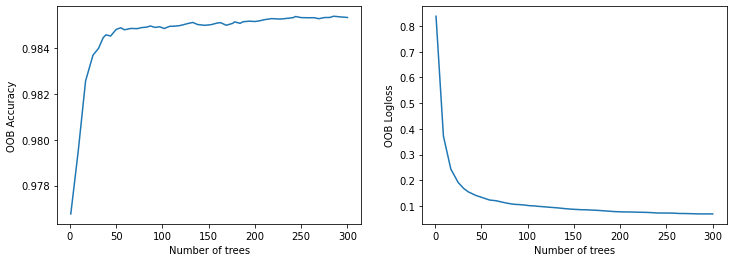

In [17]:
logs = inspector.training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("OOB Accuracy")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("OOB Logloss")

plt.show()